# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [3]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

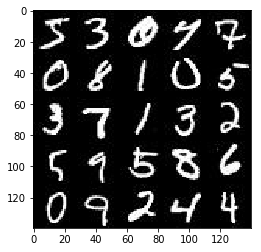

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

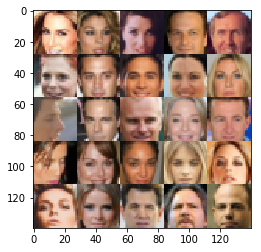

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


TensorFlow Version: 1.4.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    in_learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    return input_real, input_z, in_learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [10]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # First convolutional layer
        conv1 = tf.layers.conv2d(images, 56, 5, 2, 'SAME')
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Second convolutional layer
        conv2 = tf.layers.conv2d(conv1, 112, 5, 2, 'SAME')
        conv2 = tf.layers.batch_normalization(conv2, training=True)
        conv2 = tf.maximum(alpha*conv2, conv2)
        
        # Third convolutional layer
        conv3 = tf.layers.conv2d(conv2, 224, 5, 2, 'SAME')
        conv3 = tf.layers.batch_normalization(conv3, training=True)
        conv3 = tf.maximum(alpha*conv3, conv3)
        
        # Output fully connected layer
        flat   = tf.reshape(conv3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        
        ### REVIEWER TIP ####
        # Apply dropout so that discriminator 
        # is less prone to learning the data distribution
        logits = tf.layers.dropout(logits, rate=0.5)
        
        output = tf.sigmoid(logits)
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [11]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('generator', reuse=not(is_train)):
        
        # Input fully connected layer
        fully = tf.layers.dense(z, 7*7*112)
        fully = tf.reshape(fully, (-1, 7, 7, 112))
        fully = tf.layers.batch_normalization(fully, training=is_train)
        fully = tf.maximum(alpha*fully, fully)
        
        # First convolutional layer
        conv1 = tf.layers.conv2d_transpose(fully, 56, 5, 2, 'SAME')
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        conv1 = tf.maximum(alpha*conv1, conv1)
        
        # Output convolutional layer
        conv2 = tf.layers.conv2d_transpose(conv1, out_channel_dim, 5, 2, 'SAME')
        out = tf.tanh(conv2)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [13]:
import numpy as np
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    # Generator model
    g_model = generator(input_z, out_channel_dim)
    
    # Discriminator models
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, True)
    
    # Discriminator losses
    #### REVIEWER TIP ####
    # Use 'One Sided Label Smoothing' on labels
    d_loss_real = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, \
        labels=tf.ones_like(d_logits_real)*np.random.uniform(0.7, 1.2)))
    d_loss_fake=tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, \
        labels=tf.zeros_like(d_logits_fake)*np.random.uniform(0.0, 0.3)))
    d_loss = d_loss_real + d_loss_fake
    
    # Generator loss
    g_loss = tf.reduce_mean( \
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [14]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    dis_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    gen_updates = [op for op in update_ops if op.name.startswith('generator')]
    
    with tf.control_dependencies(gen_updates):
        dis_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        gen_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
        return dis_train_ops, gen_train_ops



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [16]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)

    steps = 0
    print_every = 10
    show_every = 100

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model

                steps += 1
                
                #### REVIEWER SUGGESTION ####
                # Normalize input to be between -1 and 1 to match generator's images
                batch_images = batch_images*2
                
                # Get input noise
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
            
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval(feed_dict={input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval(feed_dict={input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7782... Generator Loss: 9.1042
Epoch 1/2... Discriminator Loss: 0.8875... Generator Loss: 2.7829
Epoch 1/2... Discriminator Loss: 0.9865... Generator Loss: 1.4483
Epoch 1/2... Discriminator Loss: 1.4321... Generator Loss: 0.6137
Epoch 1/2... Discriminator Loss: 0.9170... Generator Loss: 1.3822
Epoch 1/2... Discriminator Loss: 1.0135... Generator Loss: 1.7621
Epoch 1/2... Discriminator Loss: 0.9841... Generator Loss: 1.4478
Epoch 1/2... Discriminator Loss: 1.6219... Generator Loss: 0.4841
Epoch 1/2... Discriminator Loss: 1.2087... Generator Loss: 0.8940
Epoch 1/2... Discriminator Loss: 0.9586... Generator Loss: 1.6368


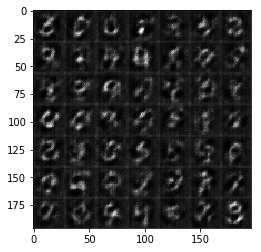

Epoch 1/2... Discriminator Loss: 1.9643... Generator Loss: 0.3145
Epoch 1/2... Discriminator Loss: 1.0166... Generator Loss: 1.0723
Epoch 1/2... Discriminator Loss: 1.2858... Generator Loss: 0.7395
Epoch 1/2... Discriminator Loss: 1.6405... Generator Loss: 0.4682
Epoch 1/2... Discriminator Loss: 0.8654... Generator Loss: 1.6652
Epoch 1/2... Discriminator Loss: 1.0946... Generator Loss: 0.9418
Epoch 1/2... Discriminator Loss: 0.9609... Generator Loss: 1.7566
Epoch 1/2... Discriminator Loss: 1.4095... Generator Loss: 0.6392
Epoch 1/2... Discriminator Loss: 1.1200... Generator Loss: 2.2643
Epoch 1/2... Discriminator Loss: 0.8789... Generator Loss: 1.6676


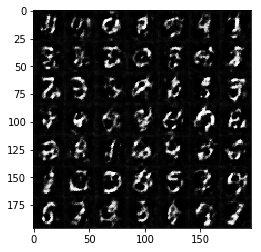

Epoch 1/2... Discriminator Loss: 0.9540... Generator Loss: 1.3441
Epoch 1/2... Discriminator Loss: 1.0877... Generator Loss: 0.9569
Epoch 1/2... Discriminator Loss: 1.8598... Generator Loss: 0.5379
Epoch 1/2... Discriminator Loss: 0.9133... Generator Loss: 1.6962
Epoch 1/2... Discriminator Loss: 0.8142... Generator Loss: 1.4919
Epoch 1/2... Discriminator Loss: 1.9639... Generator Loss: 0.4181
Epoch 1/2... Discriminator Loss: 0.8310... Generator Loss: 1.4077
Epoch 1/2... Discriminator Loss: 0.9805... Generator Loss: 1.1176
Epoch 1/2... Discriminator Loss: 0.9534... Generator Loss: 1.4295
Epoch 1/2... Discriminator Loss: 0.9000... Generator Loss: 1.7938


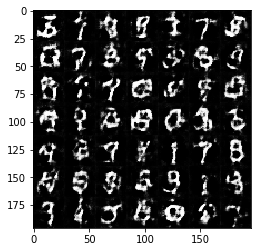

Epoch 1/2... Discriminator Loss: 1.7152... Generator Loss: 3.5670
Epoch 1/2... Discriminator Loss: 0.8566... Generator Loss: 1.4595
Epoch 1/2... Discriminator Loss: 1.1302... Generator Loss: 0.8670
Epoch 1/2... Discriminator Loss: 0.9872... Generator Loss: 1.5182
Epoch 1/2... Discriminator Loss: 1.0643... Generator Loss: 0.9568
Epoch 1/2... Discriminator Loss: 1.4882... Generator Loss: 0.6196
Epoch 1/2... Discriminator Loss: 0.8114... Generator Loss: 1.9935
Epoch 1/2... Discriminator Loss: 0.9524... Generator Loss: 1.4759
Epoch 1/2... Discriminator Loss: 1.3022... Generator Loss: 3.0356
Epoch 1/2... Discriminator Loss: 0.8236... Generator Loss: 1.5281


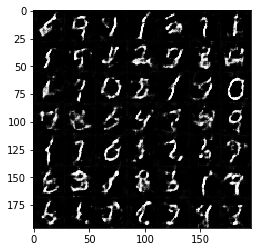

Epoch 1/2... Discriminator Loss: 1.0338... Generator Loss: 1.1604
Epoch 1/2... Discriminator Loss: 0.9096... Generator Loss: 1.5750
Epoch 1/2... Discriminator Loss: 0.9465... Generator Loss: 1.2360
Epoch 1/2... Discriminator Loss: 1.1286... Generator Loss: 0.8869
Epoch 1/2... Discriminator Loss: 0.7433... Generator Loss: 2.0621
Epoch 1/2... Discriminator Loss: 1.2213... Generator Loss: 0.8269
Epoch 1/2... Discriminator Loss: 1.9142... Generator Loss: 0.3641
Epoch 1/2... Discriminator Loss: 0.8437... Generator Loss: 2.0007
Epoch 1/2... Discriminator Loss: 1.0436... Generator Loss: 1.1522
Epoch 1/2... Discriminator Loss: 0.9925... Generator Loss: 1.8653


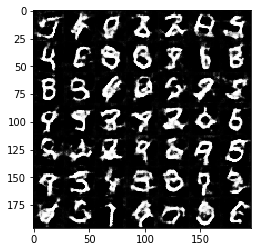

Epoch 1/2... Discriminator Loss: 0.9284... Generator Loss: 1.5761
Epoch 1/2... Discriminator Loss: 1.0910... Generator Loss: 1.0678
Epoch 1/2... Discriminator Loss: 0.9872... Generator Loss: 1.1998
Epoch 1/2... Discriminator Loss: 1.8004... Generator Loss: 0.4285
Epoch 1/2... Discriminator Loss: 1.0650... Generator Loss: 0.9804
Epoch 1/2... Discriminator Loss: 0.8287... Generator Loss: 1.8606
Epoch 1/2... Discriminator Loss: 0.9103... Generator Loss: 2.1232
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 0.8790
Epoch 1/2... Discriminator Loss: 1.4990... Generator Loss: 2.8815
Epoch 1/2... Discriminator Loss: 1.0503... Generator Loss: 0.9380


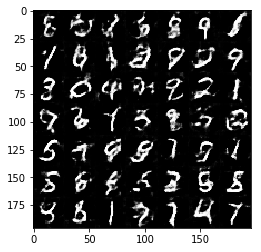

Epoch 1/2... Discriminator Loss: 1.0638... Generator Loss: 1.1144
Epoch 1/2... Discriminator Loss: 0.8544... Generator Loss: 1.8013
Epoch 1/2... Discriminator Loss: 1.1803... Generator Loss: 0.8486
Epoch 1/2... Discriminator Loss: 0.9931... Generator Loss: 2.6177
Epoch 1/2... Discriminator Loss: 1.3306... Generator Loss: 0.7263
Epoch 1/2... Discriminator Loss: 1.1958... Generator Loss: 0.9987
Epoch 1/2... Discriminator Loss: 0.9087... Generator Loss: 1.3162
Epoch 1/2... Discriminator Loss: 0.9945... Generator Loss: 1.2084
Epoch 1/2... Discriminator Loss: 1.0470... Generator Loss: 1.2176
Epoch 1/2... Discriminator Loss: 0.8821... Generator Loss: 1.4573


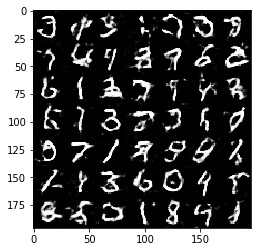

Epoch 1/2... Discriminator Loss: 1.1284... Generator Loss: 0.9492
Epoch 1/2... Discriminator Loss: 0.9544... Generator Loss: 1.1631
Epoch 1/2... Discriminator Loss: 0.8286... Generator Loss: 2.0893
Epoch 1/2... Discriminator Loss: 0.9280... Generator Loss: 1.9868
Epoch 1/2... Discriminator Loss: 0.8176... Generator Loss: 2.1042
Epoch 1/2... Discriminator Loss: 1.4322... Generator Loss: 3.1880
Epoch 1/2... Discriminator Loss: 0.8671... Generator Loss: 1.3257
Epoch 1/2... Discriminator Loss: 0.9598... Generator Loss: 1.1093
Epoch 1/2... Discriminator Loss: 1.6489... Generator Loss: 0.5571
Epoch 1/2... Discriminator Loss: 0.7472... Generator Loss: 1.6604


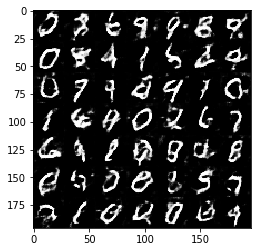

Epoch 1/2... Discriminator Loss: 1.1972... Generator Loss: 2.8701
Epoch 1/2... Discriminator Loss: 0.9213... Generator Loss: 1.8274
Epoch 1/2... Discriminator Loss: 0.8683... Generator Loss: 1.7895
Epoch 1/2... Discriminator Loss: 0.9166... Generator Loss: 1.2101
Epoch 1/2... Discriminator Loss: 1.1738... Generator Loss: 0.8920
Epoch 1/2... Discriminator Loss: 0.9505... Generator Loss: 1.2821
Epoch 1/2... Discriminator Loss: 0.8830... Generator Loss: 1.3677
Epoch 1/2... Discriminator Loss: 0.7572... Generator Loss: 1.8760
Epoch 1/2... Discriminator Loss: 0.7345... Generator Loss: 1.9934
Epoch 1/2... Discriminator Loss: 3.0140... Generator Loss: 4.9604


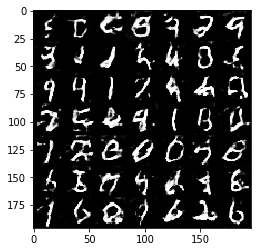

Epoch 1/2... Discriminator Loss: 0.8340... Generator Loss: 1.6167
Epoch 1/2... Discriminator Loss: 0.9806... Generator Loss: 1.3669
Epoch 1/2... Discriminator Loss: 0.9590... Generator Loss: 1.1773
Epoch 1/2... Discriminator Loss: 0.9841... Generator Loss: 1.3162
Epoch 1/2... Discriminator Loss: 0.9529... Generator Loss: 1.1597
Epoch 1/2... Discriminator Loss: 0.9154... Generator Loss: 1.3162
Epoch 1/2... Discriminator Loss: 0.7957... Generator Loss: 1.8522
Epoch 1/2... Discriminator Loss: 1.1180... Generator Loss: 0.9643
Epoch 1/2... Discriminator Loss: 1.2232... Generator Loss: 0.8048
Epoch 1/2... Discriminator Loss: 0.8034... Generator Loss: 1.4594


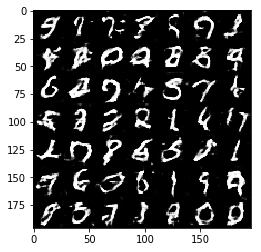

Epoch 2/2... Discriminator Loss: 0.8434... Generator Loss: 1.5478
Epoch 2/2... Discriminator Loss: 0.7994... Generator Loss: 1.6313
Epoch 2/2... Discriminator Loss: 1.4968... Generator Loss: 0.6326
Epoch 2/2... Discriminator Loss: 0.7742... Generator Loss: 2.6279
Epoch 2/2... Discriminator Loss: 0.8608... Generator Loss: 1.4896
Epoch 2/2... Discriminator Loss: 0.8300... Generator Loss: 1.4939
Epoch 2/2... Discriminator Loss: 1.6241... Generator Loss: 0.5538
Epoch 2/2... Discriminator Loss: 0.8155... Generator Loss: 1.4738
Epoch 2/2... Discriminator Loss: 0.8034... Generator Loss: 1.5753
Epoch 2/2... Discriminator Loss: 1.1085... Generator Loss: 0.9702


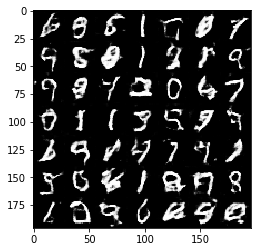

Epoch 2/2... Discriminator Loss: 1.6517... Generator Loss: 2.7322
Epoch 2/2... Discriminator Loss: 0.8571... Generator Loss: 1.3911
Epoch 2/2... Discriminator Loss: 0.9851... Generator Loss: 1.2339
Epoch 2/2... Discriminator Loss: 1.3227... Generator Loss: 0.7056
Epoch 2/2... Discriminator Loss: 0.8310... Generator Loss: 1.7473
Epoch 2/2... Discriminator Loss: 0.8667... Generator Loss: 1.4404
Epoch 2/2... Discriminator Loss: 0.8053... Generator Loss: 2.0280
Epoch 2/2... Discriminator Loss: 0.9556... Generator Loss: 1.2510
Epoch 2/2... Discriminator Loss: 0.8702... Generator Loss: 1.4097
Epoch 2/2... Discriminator Loss: 0.8073... Generator Loss: 1.5289


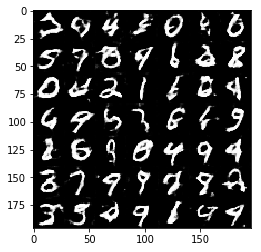

Epoch 2/2... Discriminator Loss: 1.7593... Generator Loss: 0.4770
Epoch 2/2... Discriminator Loss: 0.8612... Generator Loss: 1.6191
Epoch 2/2... Discriminator Loss: 0.9719... Generator Loss: 1.1760
Epoch 2/2... Discriminator Loss: 0.8072... Generator Loss: 2.1437
Epoch 2/2... Discriminator Loss: 0.7447... Generator Loss: 1.8945
Epoch 2/2... Discriminator Loss: 1.7222... Generator Loss: 0.4710
Epoch 2/2... Discriminator Loss: 0.8018... Generator Loss: 1.5296
Epoch 2/2... Discriminator Loss: 0.8315... Generator Loss: 1.5833
Epoch 2/2... Discriminator Loss: 0.9690... Generator Loss: 1.5007
Epoch 2/2... Discriminator Loss: 1.0988... Generator Loss: 0.9403


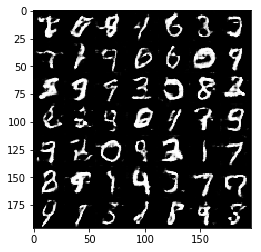

Epoch 2/2... Discriminator Loss: 0.9970... Generator Loss: 1.1304
Epoch 2/2... Discriminator Loss: 0.9790... Generator Loss: 2.2239
Epoch 2/2... Discriminator Loss: 0.9588... Generator Loss: 1.1727
Epoch 2/2... Discriminator Loss: 0.8546... Generator Loss: 1.4310
Epoch 2/2... Discriminator Loss: 0.8545... Generator Loss: 1.5807
Epoch 2/2... Discriminator Loss: 1.2662... Generator Loss: 0.7335
Epoch 2/2... Discriminator Loss: 0.7787... Generator Loss: 1.9152
Epoch 2/2... Discriminator Loss: 1.0568... Generator Loss: 1.0689
Epoch 2/2... Discriminator Loss: 0.8279... Generator Loss: 1.5634
Epoch 2/2... Discriminator Loss: 0.9104... Generator Loss: 1.1976


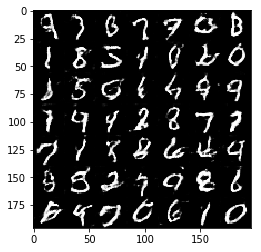

Epoch 2/2... Discriminator Loss: 0.9033... Generator Loss: 1.2597
Epoch 2/2... Discriminator Loss: 0.7282... Generator Loss: 1.9351
Epoch 2/2... Discriminator Loss: 0.7591... Generator Loss: 1.7933
Epoch 2/2... Discriminator Loss: 0.9595... Generator Loss: 1.1908
Epoch 2/2... Discriminator Loss: 0.7280... Generator Loss: 1.8218
Epoch 2/2... Discriminator Loss: 1.2034... Generator Loss: 0.8152
Epoch 2/2... Discriminator Loss: 2.0950... Generator Loss: 0.3730
Epoch 2/2... Discriminator Loss: 0.8322... Generator Loss: 1.4857
Epoch 2/2... Discriminator Loss: 1.1187... Generator Loss: 1.0401
Epoch 2/2... Discriminator Loss: 1.4104... Generator Loss: 0.7138


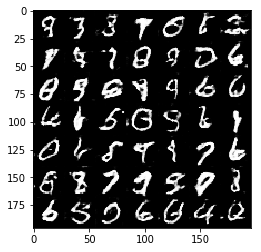

Epoch 2/2... Discriminator Loss: 0.7290... Generator Loss: 2.2379
Epoch 2/2... Discriminator Loss: 1.0869... Generator Loss: 0.9797
Epoch 2/2... Discriminator Loss: 1.0851... Generator Loss: 0.9498
Epoch 2/2... Discriminator Loss: 1.0208... Generator Loss: 1.0550
Epoch 2/2... Discriminator Loss: 0.9996... Generator Loss: 1.1526
Epoch 2/2... Discriminator Loss: 0.7206... Generator Loss: 1.9343
Epoch 2/2... Discriminator Loss: 1.4287... Generator Loss: 0.7647
Epoch 2/2... Discriminator Loss: 1.0488... Generator Loss: 1.0745
Epoch 2/2... Discriminator Loss: 0.6626... Generator Loss: 2.2352
Epoch 2/2... Discriminator Loss: 1.5604... Generator Loss: 0.6289


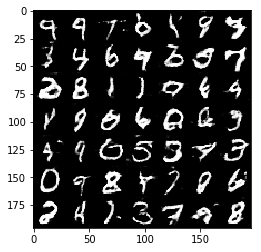

Epoch 2/2... Discriminator Loss: 0.7478... Generator Loss: 1.7091
Epoch 2/2... Discriminator Loss: 0.6658... Generator Loss: 2.0629
Epoch 2/2... Discriminator Loss: 0.7757... Generator Loss: 1.6720
Epoch 2/2... Discriminator Loss: 0.7375... Generator Loss: 1.9007
Epoch 2/2... Discriminator Loss: 1.0968... Generator Loss: 1.0907
Epoch 2/2... Discriminator Loss: 0.7971... Generator Loss: 1.5557
Epoch 2/2... Discriminator Loss: 1.2492... Generator Loss: 0.8406
Epoch 2/2... Discriminator Loss: 0.7229... Generator Loss: 1.7567
Epoch 2/2... Discriminator Loss: 0.8667... Generator Loss: 1.2812
Epoch 2/2... Discriminator Loss: 1.3991... Generator Loss: 0.8542


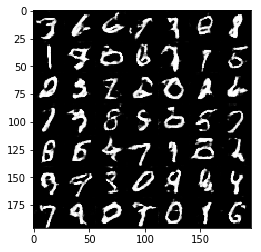

Epoch 2/2... Discriminator Loss: 1.7048... Generator Loss: 0.6098
Epoch 2/2... Discriminator Loss: 0.8940... Generator Loss: 1.6584
Epoch 2/2... Discriminator Loss: 0.7230... Generator Loss: 1.9128
Epoch 2/2... Discriminator Loss: 1.4751... Generator Loss: 0.7646
Epoch 2/2... Discriminator Loss: 1.3657... Generator Loss: 0.7905
Epoch 2/2... Discriminator Loss: 0.7241... Generator Loss: 1.8104
Epoch 2/2... Discriminator Loss: 0.7524... Generator Loss: 1.7246
Epoch 2/2... Discriminator Loss: 0.7671... Generator Loss: 1.6710
Epoch 2/2... Discriminator Loss: 0.7724... Generator Loss: 1.5786
Epoch 2/2... Discriminator Loss: 0.8819... Generator Loss: 1.3938


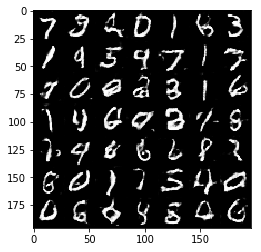

Epoch 2/2... Discriminator Loss: 0.7194... Generator Loss: 1.9451
Epoch 2/2... Discriminator Loss: 0.9243... Generator Loss: 1.2637
Epoch 2/2... Discriminator Loss: 0.8373... Generator Loss: 1.4818
Epoch 2/2... Discriminator Loss: 0.7861... Generator Loss: 2.2541
Epoch 2/2... Discriminator Loss: 1.1301... Generator Loss: 0.9900
Epoch 2/2... Discriminator Loss: 0.7853... Generator Loss: 1.8047
Epoch 2/2... Discriminator Loss: 0.7110... Generator Loss: 1.9656
Epoch 2/2... Discriminator Loss: 0.9361... Generator Loss: 1.1815
Epoch 2/2... Discriminator Loss: 0.7823... Generator Loss: 1.8886
Epoch 2/2... Discriminator Loss: 0.7719... Generator Loss: 1.6279


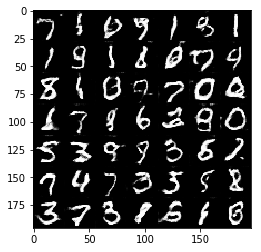

Epoch 2/2... Discriminator Loss: 0.8920... Generator Loss: 1.4899
Epoch 2/2... Discriminator Loss: 1.4154... Generator Loss: 0.6248
Epoch 2/2... Discriminator Loss: 1.0453... Generator Loss: 0.9916
Epoch 2/2... Discriminator Loss: 0.7349... Generator Loss: 1.9060
Epoch 2/2... Discriminator Loss: 0.9223... Generator Loss: 1.2294
Epoch 2/2... Discriminator Loss: 0.7264... Generator Loss: 1.8212
Epoch 2/2... Discriminator Loss: 0.7416... Generator Loss: 2.2359
Epoch 2/2... Discriminator Loss: 1.2074... Generator Loss: 0.9210
Epoch 2/2... Discriminator Loss: 1.3666... Generator Loss: 0.6911
Epoch 2/2... Discriminator Loss: 0.6903... Generator Loss: 1.9088


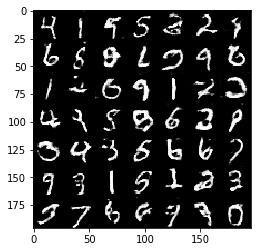

In [17]:
batch_size = 60
z_dim = 120
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: -0.3480... Generator Loss: 1.9510
Epoch 1/1... Discriminator Loss: -0.7158... Generator Loss: 2.1478
Epoch 1/1... Discriminator Loss: -1.3302... Generator Loss: 2.2291
Epoch 1/1... Discriminator Loss: -1.6935... Generator Loss: 2.5926
Epoch 1/1... Discriminator Loss: -1.9441... Generator Loss: 3.0871
Epoch 1/1... Discriminator Loss: -2.3166... Generator Loss: 3.0485
Epoch 1/1... Discriminator Loss: -2.3731... Generator Loss: 8.8060
Epoch 1/1... Discriminator Loss: -2.0936... Generator Loss: 11.7524
Epoch 1/1... Discriminator Loss: -2.6990... Generator Loss: 3.5955
Epoch 1/1... Discriminator Loss: -1.9198... Generator Loss: 13.1735


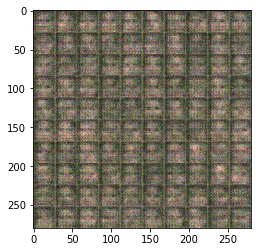

Epoch 1/1... Discriminator Loss: -1.4623... Generator Loss: 2.9447
Epoch 1/1... Discriminator Loss: -1.6304... Generator Loss: 5.2407
Epoch 1/1... Discriminator Loss: -1.0706... Generator Loss: 4.3789
Epoch 1/1... Discriminator Loss: -0.2576... Generator Loss: 7.6230
Epoch 1/1... Discriminator Loss: -0.7110... Generator Loss: 10.0474
Epoch 1/1... Discriminator Loss: -0.9241... Generator Loss: 2.4761
Epoch 1/1... Discriminator Loss: -0.8344... Generator Loss: 2.0982
Epoch 1/1... Discriminator Loss: -1.0482... Generator Loss: 4.2535
Epoch 1/1... Discriminator Loss: -1.3642... Generator Loss: 3.5251
Epoch 1/1... Discriminator Loss: -0.9942... Generator Loss: 3.9701


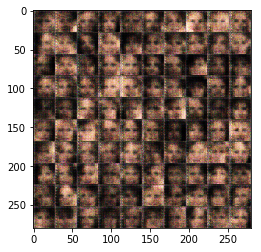

Epoch 1/1... Discriminator Loss: -0.7829... Generator Loss: 2.6973
Epoch 1/1... Discriminator Loss: -0.5834... Generator Loss: 2.5514
Epoch 1/1... Discriminator Loss: -0.6241... Generator Loss: 6.8193
Epoch 1/1... Discriminator Loss: -0.6156... Generator Loss: 3.3178
Epoch 1/1... Discriminator Loss: -0.1625... Generator Loss: 1.6640
Epoch 1/1... Discriminator Loss: -0.8978... Generator Loss: 3.8768
Epoch 1/1... Discriminator Loss: -0.5426... Generator Loss: 2.3314
Epoch 1/1... Discriminator Loss: -0.8068... Generator Loss: 7.8101
Epoch 1/1... Discriminator Loss: -1.0110... Generator Loss: 4.6266
Epoch 1/1... Discriminator Loss: -0.7643... Generator Loss: 4.1193


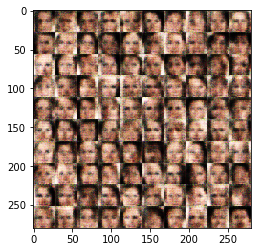

Epoch 1/1... Discriminator Loss: -0.6919... Generator Loss: 2.8748
Epoch 1/1... Discriminator Loss: -0.6987... Generator Loss: 3.8667
Epoch 1/1... Discriminator Loss: 0.1345... Generator Loss: 0.9559
Epoch 1/1... Discriminator Loss: 0.0095... Generator Loss: 7.3910
Epoch 1/1... Discriminator Loss: -0.2843... Generator Loss: 2.6804
Epoch 1/1... Discriminator Loss: -0.4297... Generator Loss: 2.6632
Epoch 1/1... Discriminator Loss: -0.4514... Generator Loss: 2.9462
Epoch 1/1... Discriminator Loss: -0.5456... Generator Loss: 2.8527
Epoch 1/1... Discriminator Loss: 0.3903... Generator Loss: 7.6151
Epoch 1/1... Discriminator Loss: -0.4079... Generator Loss: 3.8769


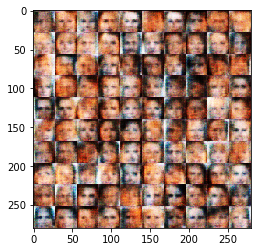

Epoch 1/1... Discriminator Loss: 0.2569... Generator Loss: 1.1505
Epoch 1/1... Discriminator Loss: 0.3653... Generator Loss: 8.0768
Epoch 1/1... Discriminator Loss: -0.5578... Generator Loss: 3.1527
Epoch 1/1... Discriminator Loss: -0.1845... Generator Loss: 2.2565
Epoch 1/1... Discriminator Loss: -0.3310... Generator Loss: 2.5246
Epoch 1/1... Discriminator Loss: -0.1407... Generator Loss: 1.7417
Epoch 1/1... Discriminator Loss: -0.4538... Generator Loss: 3.7768
Epoch 1/1... Discriminator Loss: -0.3187... Generator Loss: 2.3943
Epoch 1/1... Discriminator Loss: -0.3893... Generator Loss: 3.6104
Epoch 1/1... Discriminator Loss: -0.2689... Generator Loss: 1.9500


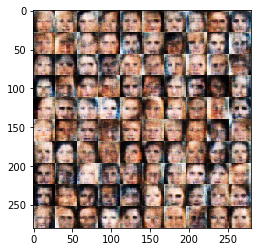

Epoch 1/1... Discriminator Loss: -0.3241... Generator Loss: 3.3893
Epoch 1/1... Discriminator Loss: 0.4733... Generator Loss: 9.2482
Epoch 1/1... Discriminator Loss: -0.5044... Generator Loss: 2.6046
Epoch 1/1... Discriminator Loss: -0.4350... Generator Loss: 2.8479
Epoch 1/1... Discriminator Loss: -0.4894... Generator Loss: 3.1004
Epoch 1/1... Discriminator Loss: -0.4762... Generator Loss: 3.1057
Epoch 1/1... Discriminator Loss: -0.3805... Generator Loss: 2.7955
Epoch 1/1... Discriminator Loss: -0.5850... Generator Loss: 2.8052
Epoch 1/1... Discriminator Loss: -0.4281... Generator Loss: 3.6895
Epoch 1/1... Discriminator Loss: -0.4761... Generator Loss: 2.8706


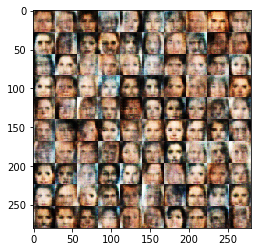

Epoch 1/1... Discriminator Loss: -0.4198... Generator Loss: 4.1445
Epoch 1/1... Discriminator Loss: -0.3074... Generator Loss: 2.8666
Epoch 1/1... Discriminator Loss: 0.6996... Generator Loss: 0.7227
Epoch 1/1... Discriminator Loss: -0.3581... Generator Loss: 3.7262
Epoch 1/1... Discriminator Loss: -0.2482... Generator Loss: 2.4378
Epoch 1/1... Discriminator Loss: -0.2834... Generator Loss: 2.3780
Epoch 1/1... Discriminator Loss: -0.5078... Generator Loss: 3.3651
Epoch 1/1... Discriminator Loss: -0.2386... Generator Loss: 2.1918
Epoch 1/1... Discriminator Loss: -0.3215... Generator Loss: 2.4926
Epoch 1/1... Discriminator Loss: -0.1686... Generator Loss: 2.1974


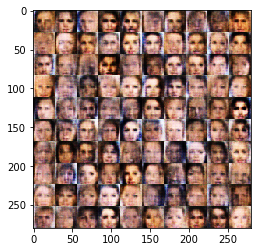

Epoch 1/1... Discriminator Loss: -0.1748... Generator Loss: 1.5732
Epoch 1/1... Discriminator Loss: -0.3750... Generator Loss: 3.7429
Epoch 1/1... Discriminator Loss: -0.2801... Generator Loss: 1.9577
Epoch 1/1... Discriminator Loss: -0.0350... Generator Loss: 1.4034
Epoch 1/1... Discriminator Loss: 0.5532... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: -0.3539... Generator Loss: 3.8126
Epoch 1/1... Discriminator Loss: 0.7287... Generator Loss: 7.6790
Epoch 1/1... Discriminator Loss: -0.0239... Generator Loss: 2.2132
Epoch 1/1... Discriminator Loss: 0.6746... Generator Loss: 0.9295
Epoch 1/1... Discriminator Loss: -0.1645... Generator Loss: 2.0613


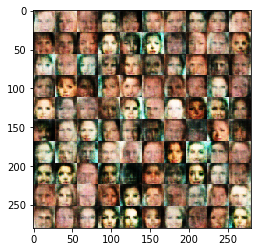

Epoch 1/1... Discriminator Loss: -0.1949... Generator Loss: 2.1336
Epoch 1/1... Discriminator Loss: -0.1860... Generator Loss: 3.1268
Epoch 1/1... Discriminator Loss: -0.1524... Generator Loss: 2.0293
Epoch 1/1... Discriminator Loss: 0.6496... Generator Loss: 4.0179
Epoch 1/1... Discriminator Loss: -0.1590... Generator Loss: 2.3277
Epoch 1/1... Discriminator Loss: 0.0266... Generator Loss: 1.8500
Epoch 1/1... Discriminator Loss: 0.0293... Generator Loss: 4.0310
Epoch 1/1... Discriminator Loss: -0.0857... Generator Loss: 2.5823
Epoch 1/1... Discriminator Loss: -0.2481... Generator Loss: 2.6982
Epoch 1/1... Discriminator Loss: 0.3345... Generator Loss: 1.0757


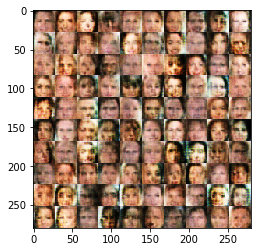

Epoch 1/1... Discriminator Loss: 0.3449... Generator Loss: 0.9171
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 3.7800
Epoch 1/1... Discriminator Loss: -0.1918... Generator Loss: 2.3857
Epoch 1/1... Discriminator Loss: -0.0318... Generator Loss: 1.9284
Epoch 1/1... Discriminator Loss: 0.1572... Generator Loss: 1.7210
Epoch 1/1... Discriminator Loss: 0.1271... Generator Loss: 1.4808
Epoch 1/1... Discriminator Loss: -0.1350... Generator Loss: 2.8051
Epoch 1/1... Discriminator Loss: 0.0216... Generator Loss: 2.8140
Epoch 1/1... Discriminator Loss: 0.0991... Generator Loss: 1.7265
Epoch 1/1... Discriminator Loss: 0.4986... Generator Loss: 0.7889


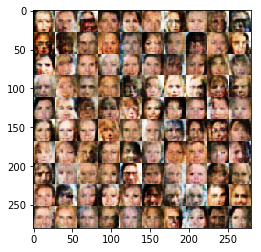

Epoch 1/1... Discriminator Loss: 0.0083... Generator Loss: 1.9079
Epoch 1/1... Discriminator Loss: 0.1026... Generator Loss: 1.6834
Epoch 1/1... Discriminator Loss: 0.2856... Generator Loss: 1.2213
Epoch 1/1... Discriminator Loss: 0.1133... Generator Loss: 1.6095
Epoch 1/1... Discriminator Loss: 0.5835... Generator Loss: 3.7198
Epoch 1/1... Discriminator Loss: 0.0440... Generator Loss: 2.2918
Epoch 1/1... Discriminator Loss: 0.1291... Generator Loss: 2.3165
Epoch 1/1... Discriminator Loss: 0.0668... Generator Loss: 3.1022
Epoch 1/1... Discriminator Loss: 0.1827... Generator Loss: 2.2034
Epoch 1/1... Discriminator Loss: 0.3880... Generator Loss: 2.7643


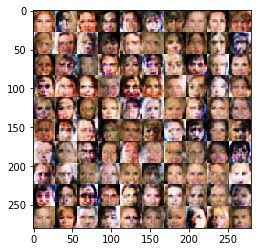

Epoch 1/1... Discriminator Loss: 0.1643... Generator Loss: 1.5893
Epoch 1/1... Discriminator Loss: 0.2044... Generator Loss: 2.6003
Epoch 1/1... Discriminator Loss: 0.1340... Generator Loss: 2.7439
Epoch 1/1... Discriminator Loss: 0.1998... Generator Loss: 1.8139
Epoch 1/1... Discriminator Loss: 0.1591... Generator Loss: 1.4708
Epoch 1/1... Discriminator Loss: 0.0836... Generator Loss: 2.2068
Epoch 1/1... Discriminator Loss: 0.1681... Generator Loss: 2.1573
Epoch 1/1... Discriminator Loss: 0.1930... Generator Loss: 1.3225
Epoch 1/1... Discriminator Loss: 0.0916... Generator Loss: 1.9480
Epoch 1/1... Discriminator Loss: 0.1960... Generator Loss: 2.0187


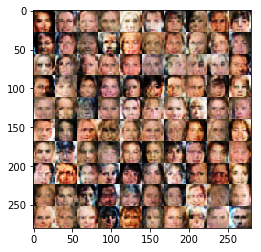

Epoch 1/1... Discriminator Loss: 0.1603... Generator Loss: 1.5464
Epoch 1/1... Discriminator Loss: 0.1993... Generator Loss: 1.4942
Epoch 1/1... Discriminator Loss: 0.1562... Generator Loss: 1.4650
Epoch 1/1... Discriminator Loss: 0.2637... Generator Loss: 2.2157
Epoch 1/1... Discriminator Loss: 0.1792... Generator Loss: 2.6936
Epoch 1/1... Discriminator Loss: 0.2727... Generator Loss: 1.1636
Epoch 1/1... Discriminator Loss: 0.3559... Generator Loss: 2.1106
Epoch 1/1... Discriminator Loss: -0.0615... Generator Loss: 2.3338
Epoch 1/1... Discriminator Loss: 0.2539... Generator Loss: 2.3456
Epoch 1/1... Discriminator Loss: 0.5121... Generator Loss: 0.8739


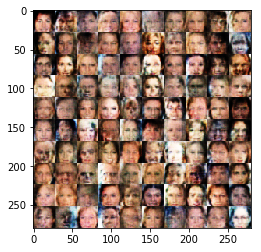

Epoch 1/1... Discriminator Loss: 0.3614... Generator Loss: 1.3712
Epoch 1/1... Discriminator Loss: 0.3887... Generator Loss: 1.8822
Epoch 1/1... Discriminator Loss: 0.1676... Generator Loss: 1.8459
Epoch 1/1... Discriminator Loss: 0.0387... Generator Loss: 1.7981
Epoch 1/1... Discriminator Loss: 0.1243... Generator Loss: 1.6826
Epoch 1/1... Discriminator Loss: 0.1753... Generator Loss: 1.3211
Epoch 1/1... Discriminator Loss: 0.0300... Generator Loss: 2.2661
Epoch 1/1... Discriminator Loss: 0.2261... Generator Loss: 1.4987
Epoch 1/1... Discriminator Loss: 0.0258... Generator Loss: 1.8620
Epoch 1/1... Discriminator Loss: 0.2641... Generator Loss: 1.6861


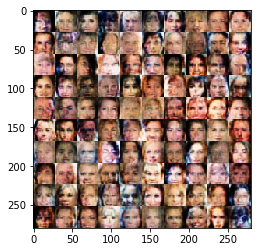

Epoch 1/1... Discriminator Loss: 0.2239... Generator Loss: 1.4802
Epoch 1/1... Discriminator Loss: 0.3931... Generator Loss: 0.9639
Epoch 1/1... Discriminator Loss: 0.2154... Generator Loss: 2.4244
Epoch 1/1... Discriminator Loss: 0.0236... Generator Loss: 1.8005
Epoch 1/1... Discriminator Loss: 0.1335... Generator Loss: 2.1202
Epoch 1/1... Discriminator Loss: 0.3191... Generator Loss: 2.0982
Epoch 1/1... Discriminator Loss: 0.2334... Generator Loss: 1.5615
Epoch 1/1... Discriminator Loss: 0.3442... Generator Loss: 1.0226
Epoch 1/1... Discriminator Loss: 0.2395... Generator Loss: 1.6005
Epoch 1/1... Discriminator Loss: 0.2362... Generator Loss: 1.5506


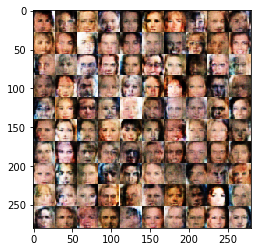

Epoch 1/1... Discriminator Loss: -0.0722... Generator Loss: 2.2918
Epoch 1/1... Discriminator Loss: 0.1642... Generator Loss: 1.9384
Epoch 1/1... Discriminator Loss: 0.2510... Generator Loss: 2.9423
Epoch 1/1... Discriminator Loss: 0.1700... Generator Loss: 1.6728
Epoch 1/1... Discriminator Loss: 0.1319... Generator Loss: 2.0099
Epoch 1/1... Discriminator Loss: 0.1538... Generator Loss: 1.4944
Epoch 1/1... Discriminator Loss: 0.2539... Generator Loss: 1.4753
Epoch 1/1... Discriminator Loss: 0.0647... Generator Loss: 1.6389
Epoch 1/1... Discriminator Loss: 0.1309... Generator Loss: 1.9805
Epoch 1/1... Discriminator Loss: 0.1300... Generator Loss: 1.8780


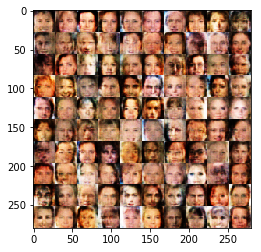

Epoch 1/1... Discriminator Loss: 0.0907... Generator Loss: 1.8892
Epoch 1/1... Discriminator Loss: 0.0586... Generator Loss: 1.7576
Epoch 1/1... Discriminator Loss: 0.2332... Generator Loss: 1.2651
Epoch 1/1... Discriminator Loss: 0.1920... Generator Loss: 1.2211
Epoch 1/1... Discriminator Loss: 0.1855... Generator Loss: 1.4475
Epoch 1/1... Discriminator Loss: 0.2331... Generator Loss: 2.4413
Epoch 1/1... Discriminator Loss: 0.2371... Generator Loss: 1.4278
Epoch 1/1... Discriminator Loss: 0.3240... Generator Loss: 1.2760


In [18]:
batch_size = 120
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.